<a href="https://colab.research.google.com/github/jasmehla/population-analysis-colab/blob/main/Task_2_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2

In [1]:
from google.colab import files
uploaded = files.upload()

Saving titanic.zip to titanic.zip


In [2]:
import zipfile
import os
with zipfile.ZipFile("titanic.zip", "r") as zip_ref:
    zip_ref.extractall("titanic_data")
os.listdir("titanic_data")  # Check CSV files

['gender_submission.csv', 'train.csv', 'test.csv']

In [3]:
import pandas as pd

df = pd.read_csv("titanic_data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# Drop not useful columns
df = df.drop(['Cabin', 'Ticket', 'Name'], axis=1)
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())
# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Encode categorical columns
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

<Axes: title={'center': 'Survival Count'}, xlabel='Survived'>

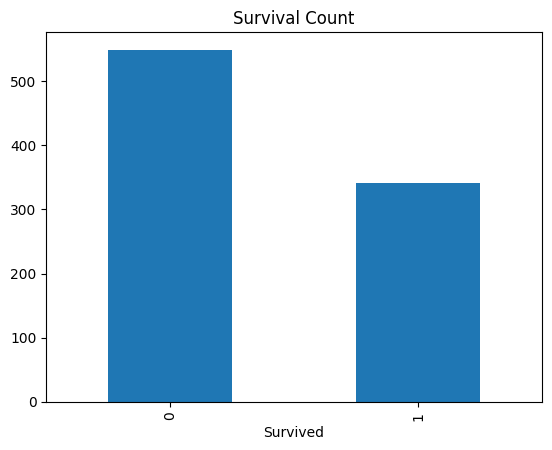

In [6]:
df['Survived'].value_counts().plot(kind='bar', title='Survival Count')


<Axes: xlabel='Survived', ylabel='count'>

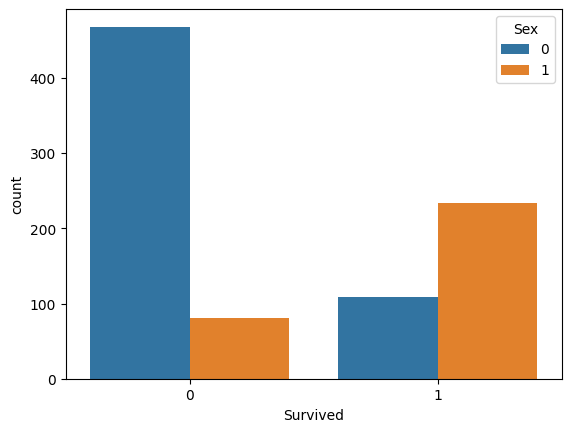

In [7]:
import seaborn as sns
sns.countplot(x='Survived', hue='Sex', data=df)


<Axes: xlabel='Age', ylabel='Count'>

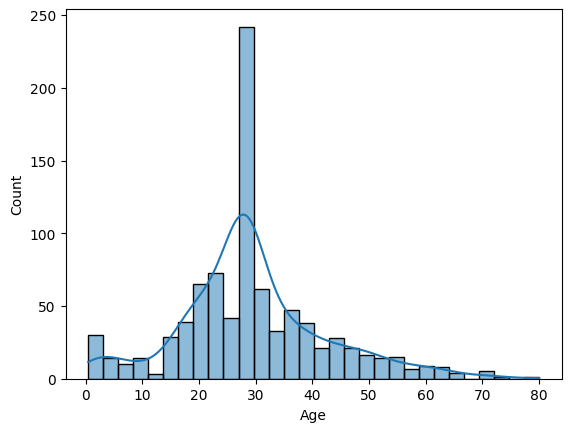

In [8]:
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='Pclass', ylabel='count'>

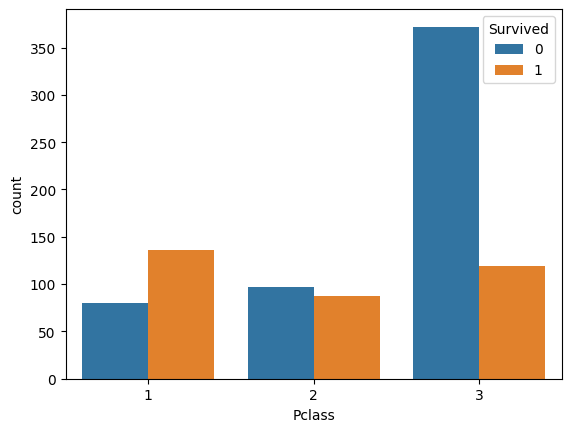

In [9]:
sns.countplot(x='Pclass', hue='Survived', data=df)

<Axes: >

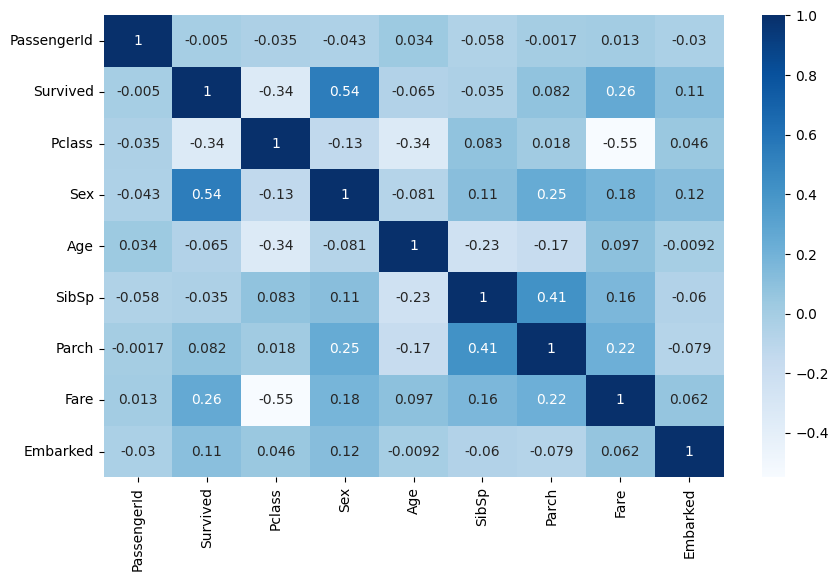

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")

After visualizations,we observe:

1 Females had higher survival rate.

2 Pclass 1 had more survivors than class 3.

3 Younger passengers survived more often